<a href="https://colab.research.google.com/github/Yejide123/Nigeria-2023_Multi_Sentiment_analysis_Project/blob/main/Project_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM SENTIMENT **ANALYSIS**

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive') # mount on google drive to access the data
path = "/content/drive/MyDrive/Project_codes/train_labelled_data.csv"
train_data = pd.read_csv(path) # read in the labelled data

Mounted at /content/drive


In [ ]:
pip install tensorflow


In [ ]:
train_data

,Unnamed: 0,text,cleaned_text,scores,label
0,0,#OBI and #wife storm kastina state today.\n\nS...,wife storm kastina state todaysee crowd nigeri...,0.6249,positive
1,1,"If they can’t point to you one project , inves...",can ’ t point one project investment vision le...,0.2500,positive
2,2,@atiku God with his infinite mercy will never ...,god infinite mercy never allow emerge presiden...,-0.6874,negative
3,3,Governor @RotimiAkeredolu takes Asiwaju Bola A...,rotimiakeredolu take asiwaju bola ahmed tinubu...,0.0000,neutral
4,4,@atiku Salutation is not Love. #Obi is coming,salutation love obi come,0.6369,positive
...,...,...,...,...,...
62137,74558,"I wish to convey my sympathies to the victims,...",wish convey sympathy victim gov zulum shehu bo...,0.4767,positive
62138,74559,I received with great sadness reports of the r...,receive great sadness report raze popular maid...,0.3818,positive
62139,74560,My deepest condolences to his family and the F...,deep condolence family fct pdp family may soul...,0.5423,positive
62140,74561,Hon Sunday Zaka truly embodied the Recovery sp...,sunday zaka truly embody recovery spirit pdp e...,0.5574,positive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, accuracy_score

# X contains the text data and y contains the labels
X = train_data['cleaned_text']
y = train_data['label']
X = [str(x) for x in X] # convert all data type to str


# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences)

#  Encode labels
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(pd.DataFrame(y)).toarray()

#  Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

# Build LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=X_padded.shape[1]))
model.add(LSTM(units=50))
model.add(Dense(units=y_encoded.shape[1], activation='softmax'))

# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# STrain Model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

#  Evaluate Model
accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy[1]}')



Epoch 1/10
1243/1243 [==============================] - 31s 22ms/step - loss: 0.4756 - accuracy: 0.8161 - val_loss: 0.2622 - val_accuracy: 0.9214
Epoch 2/10
1243/1243 [==============================] - 11s 9ms/step - loss: 0.1473 - accuracy: 0.9551 - val_loss: 0.2472 - val_accuracy: 0.9268
Epoch 3/10
1243/1243 [==============================] - 9s 7ms/step - loss: 0.0830 - accuracy: 0.9731 - val_loss: 0.2872 - val_accuracy: 0.9223
Epoch 4/10
1243/1243 [==============================] - 9s 7ms/step - loss: 0.0521 - accuracy: 0.9827 - val_loss: 0.2877 - val_accuracy: 0.9190
Epoch 5/10
1243/1243 [==============================] - 9s 8ms/step - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.3253 - val_accuracy: 0.9268
Epoch 6/10
1243/1243 [==============================] - 9s 7ms/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.3272 - val_accuracy: 0.9298
Epoch 7/10
1243/1243 [==============================] - 10s 8ms/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.3792 - val_accur

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#  Evaluate Model usingtest
predictions = model.predict(X_test)

# Convert predictions to binary labels
binary_predictions = (predictions > 0.5).astype(int)



# Display the LSTM classification report
print("\nClassification Report:")
print(classification_report(y_test.argmax(axis=1), binary_predictions.argmax(axis=1)))

# Display accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), binary_predictions.argmax(axis=1))
print(f'Test Accuracy: {accuracy}')


389/389 [==============================] - 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      2389
           1       0.95      0.94      0.95      4723
           2       0.94      0.92      0.93      5317

    accuracy                           0.92     12429
   macro avg       0.91      0.92      0.91     12429
weighted avg       0.92      0.92      0.92     12429

Test Accuracy: 0.9230026550808593


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#  Evaluate Model usingtest
predictions = model.predict(X_test)

# Convert predictions to binary labels
binary_predictions = (predictions > 0.5).astype(int)

# Get confusion matrix
#conf_matrix = confusion_matrix(y_test.argmax(axis=1), binary_predictions.argmax(axis=1))

# Display the confusion matrix
#print("Confusion Matrix:")
#print(conf_matrix)

# Display the LSTM classification report
print("\nClassification Report:")
#print(classification_report(y_test.argmax(axis=1), binary_predictions.argmax(axis=1)))

print(classification_report(y_test, binary_predictions))

# Display accuracy
#accuracy = accuracy_score(y_test.argmax(axis=1), binary_predictions.argmax(axis=1))
print(f'Test Accuracy: {accuracy}')

389/389 [==============================] - 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      2389
           1       0.95      0.94      0.95      4723
           2       0.94      0.92      0.93      5317

   micro avg       0.93      0.92      0.92     12429
   macro avg       0.91      0.91      0.91     12429
weighted avg       0.93      0.92      0.92     12429
 samples avg       0.92      0.92      0.92     12429

Test Accuracy: 0.9230026550808593


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np

# predict sample text
new_text = ['good', 'bad', 'I like Tinubu', 'I like Atiku', 'I hate Obi']

# Tokenize and pad the new text
new_text_sequences = tokenizer.texts_to_sequences(new_text)
new_text_padded = pad_sequences(new_text_sequences, maxlen=X_padded.shape[1])

# Make predictions
predictions = model.predict(new_text_padded)

# Assuming 'predictions' is a one-hot encoded array, you can get the predicted class index
predicted_class_index = predictions.argmax(axis=1)


# initiliase the classes for encoding
num_classes = 3

# Reshape the predicted_class_index to have the same number of columns as the original encoding
predicted_class_index = predicted_class_index.reshape(-1, 1)

# Create a new array with zeros
predicted_class_encoded = np.zeros((predicted_class_index.shape[0], num_classes))

# Set the predicted class to 1 for each row
predicted_class_encoded[np.arange(predicted_class_index.shape[0]), predicted_class_index.flatten()] = 1

# Inverse transform the encoded array
predicted_class_label = encoder.inverse_transform(predicted_class_encoded)

#print("Predicted Class Label:", predicted_class_label)
LSTM_Sample = pd.DataFrame(np.column_stack(predicted_class_label),
                               columns=new_text)
LSTM_Sample




1/1 [==============================] - 0s 34ms/step


,good,bad,I like Tinubu,I like Atiku,I hate Obi
0,positive,negative,positive,positive,negative


In [ ]:
import numpy as np

# predict sample text
new_text = ['good', 'bad', 'I like Tinubu', 'I like Atiku', 'I hate Obi']

# Tokenize and pad the new text
new_text_sequences = tokenizer.texts_to_sequences(new_text)
new_text_padded = pad_sequences(new_text_sequences, maxlen=X_padded.shape[1])

# Make predictions
predictions = model.predict(new_text_padded)

# Assuming 'predictions' is a one-hot encoded array, you can get the predicted class index
predicted_class_index = predictions.argmax(axis=1)


# initiliase the classes for encoding
num_classes = 3

# Reshape the predicted_class_index to have the same number of columns as the original encoding
predicted_class_index = predicted_class_index.reshape(-1, 1)

# Create a new array with zeros
predicted_class_encoded = np.zeros((predicted_class_index.shape[0], num_classes))

# Set the predicted class to 1 for each row
predicted_class_encoded[np.arange(predicted_class_index.shape[0]), predicted_class_index.flatten()] = 1

# Inverse transform the encoded array
predicted_class_label = encoder.inverse_transform(predicted_class_encoded)

#print("Predicted Class Label:", predicted_class_label)
LSTM_Sample = pd.DataFrame(np.column_stack(predicted_class_label),
                               columns=new_text)
LSTM_Sample


1/1 [==============================] - 0s 17ms/step


,good,bad,I like Tinubu,I like Atiku,I hate Obi
0,positive,negative,positive,positive,negative


In [ ]:
import numpy as np
import pandas as pd

# Assuming you have a tokenizer and encoder defined
# tokenizer = ...
# encoder = ...

# Assuming you have a trained model defined
# model = ...

# predict sample text
new_text = ['good', 'bad', 'I like Tinubu', 'I like Atiku', 'I hate Obi']

# Tokenize and pad the new text
new_text_sequences = tokenizer.texts_to_sequences(new_text)
new_text_padded = pad_sequences(new_text_sequences, maxlen=X_padded.shape[1])

# Make predictions
predictions = model.predict(new_text_padded)

# Assuming 'predictions' is a one-hot encoded array, you can get the predicted class index
predicted_class_index = predictions.argmax(axis=1)

# Convert predicted_class_index to one-hot encoded format
num_classes = 3
predicted_class_onehot = np.eye(num_classes)[predicted_class_index]

# Inverse transform the one-hot encoded format to get the class labels
predicted_class_labels = encoder.inverse_transform(predicted_class_onehot)

# Reshape to 1D array
predicted_class_labels = predicted_class_labels.flatten()

# Create a DataFrame to display the results
LSTM_Sample = pd.DataFrame({'Text': new_text, 'Predicted Label': predicted_class_labels})

# Print the DataFrame
print(LSTM_Sample)


1/1 [==============================] - 0s 27ms/step
            Text Predicted Label
0           good        positive
1            bad        negative
2  I like Tinubu        positive
3   I like Atiku        positive
4     I hate Obi        negative


In [ ]:
import numpy as np
import pandas as pd



# predict sample text
new_text = ['good', 'bad', 'I like Tinubu', 'I like Atiku', 'I hate Obi']

# Tokenize and pad the new text
new_text_sequences = tokenizer.texts_to_sequences(new_text)
new_text_padded = pad_sequences(new_text_sequences, maxlen=X_padded.shape[1])

# Make predictions
predictions = model.predict(new_text_padded)

# Get the predicted class index
predicted_class_index = predictions.argmax(axis=1)

# Create a DataFrame to display the results
LSTM_Sample = pd.DataFrame({'Text': new_text, 'Predicted Label': predicted_class_index})

# Print the DataFrame
print(LSTM_Sample)


1/1 [==============================] - 0s 28ms/step
            Text  Predicted Label
0           good                2
1            bad                0
2  I like Tinubu                2
3   I like Atiku                2
4     I hate Obi                0


# TINUBU LSTM SENTIMENT **RESULT**

In [ ]:
import numpy as np
path =  '/content/drive/MyDrive/Project_codes/Tinubu_cleaned_dataset.csv'
Tinubu_data = pd.read_csv(path)
Tinubu_data = Tinubu_data.replace(np.nan, '', regex=True)
Tinubu_text = Tinubu_data['cleaned_text'].tolist()
# Tokenize and pad the Tinubu text
Tinubu_text_sequences = tokenizer.texts_to_sequences(Tinubu_text)
Tinubu_text_padded = pad_sequences(Tinubu_text_sequences, maxlen=X_padded.shape[1])
# Make predictions
predictions = model.predict(Tinubu_text_padded)
#  get the predicted class index
predicted_class_index = predictions.argmax(axis=1)
#intialise the 3 classes for encoding
num_classes = 3

# Reshape the predicted_class_index to have the same number of columns as the original encoding
predicted_class_index = predicted_class_index.reshape(-1, 1)
# Create a new array with zeros
predicted_class_encoded = np.zeros((predicted_class_index.shape[0], num_classes))

# Set the predicted class to 1 for each row
predicted_class_encoded[np.arange(predicted_class_index.shape[0]), predicted_class_index.flatten()] = 1

# Inverse transform the encoded array
predicted_class_label = encoder.inverse_transform(predicted_class_encoded)



5520/5520 [==============================] - 15s 3ms/step


In [ ]:
# Add the the list of the predicted Tinubu data to the main data
Tinubu_sentiment_result = pd.DataFrame(predicted_class_label, columns=['Tinubu_LSTM_Sentiment'])
Tinubu_sentiment_result['text'] = Tinubu_text

Tinubu_sentiment_result

,Tinubu_LSTM_Sentiment,text
0,negative,elder statesman tanko yakassai drop bomb tinub...
1,negative,say apc single dirt peter obi would easily use...
2,negative,election day come large group tinubus hooligan...
3,positive,peter obi teach agbado tinubu show street cred...
4,positive,profound heartfelt appreciation go people lago...
...,...,...
176623,positive,peter obi vs asiwaju rally kwara venue e didnt...
176624,neutral,peter obi lp new nigeria democracy politics pe...
176625,negative,word street fuel nd naira note scarcity plot s...
176626,negative,la las get sense force day presidential electi...


In [ ]:
Tinubu_data

In [ ]:

Tinubu_sentiment_result = pd.DataFrame(predicted_class_label, columns=['Tinubu_LSTM_Sentiment'])
Tinubu_sentiment_result['text'] = Tinubu_text

Tinubu_sentiment_result

,Tinubu_LSTM_Sentiment,text
0,negative,elder statesman tanko yakassai drop bomb tinub...
1,negative,say apc single dirt peter obi would easily use...
2,negative,election day come large group tinubus hooligan...
3,positive,peter obi teach agbado tinubu show street cred...
4,positive,profound heartfelt appreciation go people lago...
...,...,...
176623,positive,peter obi vs asiwaju rally kwara venue e didnt...
176624,neutral,peter obi lp new nigeria democracy politics pe...
176625,negative,word street fuel nd naira note scarcity plot s...
176626,negative,la las get sense force day presidential electi...


In [ ]:
Tinubu_sentiment_result['Tinubu_LSTM_Sentiment'].value_counts()

positive    79320
negative    51360
neutral     45948
Name: Tinubu_LSTM_Sentiment, dtype: int64

<Axes: title={'center': 'Tinubu LSTM SENTIMENT ANALYSIS'}>

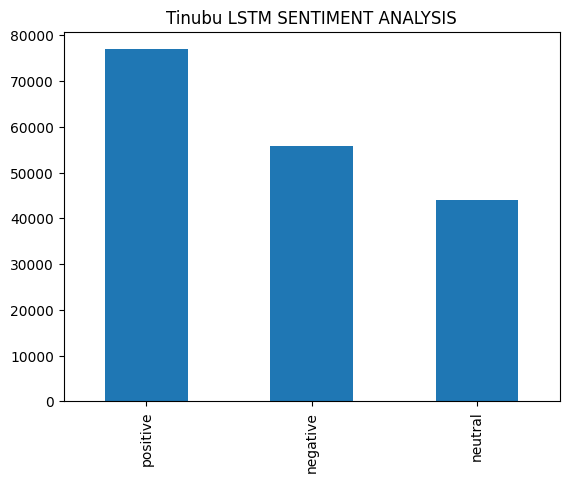

In [ ]:
Tinubu_sentiment_result['Tinubu_LSTM_Sentiment'].value_counts().plot(kind ='bar', title = 'Tinubu LSTM SENTIMENT ANALYSIS') #  plot the graph for Tinubu sentiments output

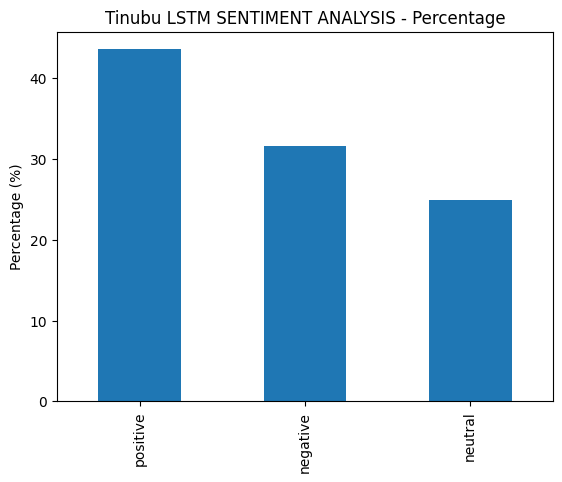

In [ ]:
import matplotlib.pyplot as plt


# Calculate the percentage for each sentiment category
Tinubu_percentage_counts = (Tinubu_sentiment_result['Tinubu_LSTM_Sentiment'].value_counts(normalize=True) * 100).round(2)

# Plotting the percentages
Tinubu_percentage_counts.plot(kind='bar', title='Tinubu LSTM SENTIMENT ANALYSIS - Percentage')
plt.ylabel('Percentage (%)')
plt.show()


In [ ]:
Tinubu_percentage_counts

positive    43.54
negative    31.55
neutral     24.91
Name: Tinubu_LSTM_Sentiment, dtype: float64

OBI'S LSTM SENTIMENT ANALYSIS

In [ ]:
path =  '/content/drive/MyDrive/Project_codes/Obi_cleaned_dataset.csv'
Obi_data = pd.read_csv(path)
Obi_data = Obi_data.replace(np.nan, '', regex=True)
Obi_text = Obi_data['cleaned_text'].tolist()
# Tokenize and pad the new text
Obi_text_sequences = tokenizer.texts_to_sequences(Obi_text)
Obi_text_padded = pad_sequences(Obi_text_sequences, maxlen=X_padded.shape[1])
# Make predictions
predictions = model.predict(Obi_text_padded)
# Assuming 'predictions' is a one-hot encoded array, you can get the predicted class index
predicted_class_index = predictions.argmax(axis=1)
# initialise the three classes for encoding
num_classes = 3

# Reshape the predicted_class_index to have the same number of columns as the original encoding
predicted_class_index = predicted_class_index.reshape(-1, 1)
# Create a new array with zeros
predicted_class_encoded = np.zeros((predicted_class_index.shape[0], num_classes))
# Set the predicted class to 1 for each row
predicted_class_encoded[np.arange(predicted_class_index.shape[0]), predicted_class_index.flatten()] = 1
# Inverse transform the encoded array
predicted_class_label = encoder.inverse_transform(predicted_class_encoded)


6990/6990 [==============================] - 22s 3ms/step


In [ ]:
# Add the list of the predicted data to Obi's data
Obi_sentiment_result = pd.DataFrame(predicted_class_label, columns=['Obi_LSTM_Sentiment'])
Obi_sentiment_result['text'] = Obi_text

Obi_sentiment_result

,Obi_LSTM_Sentiment,text
0,negative,say apc single dirt peter obi would easily use...
1,positive,fun fact support obi
2,negative,dangerous kidnapper anambra peter obi governor...
3,positive,peter obi do part onus u go massively vote may...
4,positive,peter obi teach agbado tinubu show street cred...
...,...,...
223657,neutral,first choice obi second choice obi third choic...
223658,positive,podiumreporters deeoneayekooto peterobi tinubu...
223659,positive,peter obi vs asiwaju rally kwara venue e didnt...
223660,neutral,peter obi lp new nigeria democracy politics pe...


<Axes: title={'center': 'OBI LSTM SENTIMENT ANALYSIS'}>

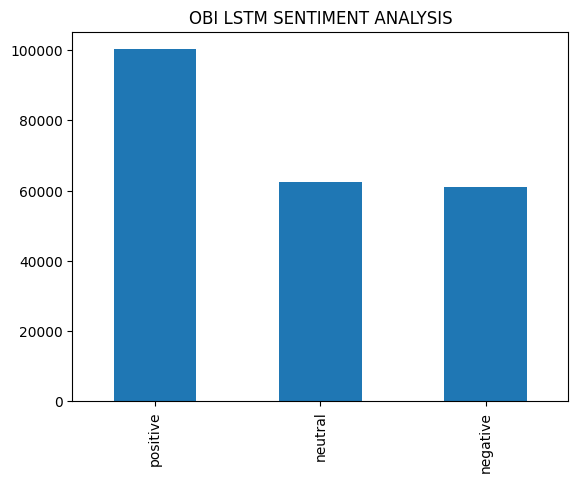

In [ ]:
Obi_sentiment_result['Obi_LSTM_Sentiment'].value_counts().plot(kind ='bar', title = 'OBI LSTM SENTIMENT ANALYSIS') # plot the graph for Obi's sentiments output

In [ ]:
Obi_sentiment_result['Obi_LSTM_Sentiment'].value_counts()

positive    99110
negative    66150
neutral     58402
Name: Obi_LSTM_Sentiment, dtype: int64

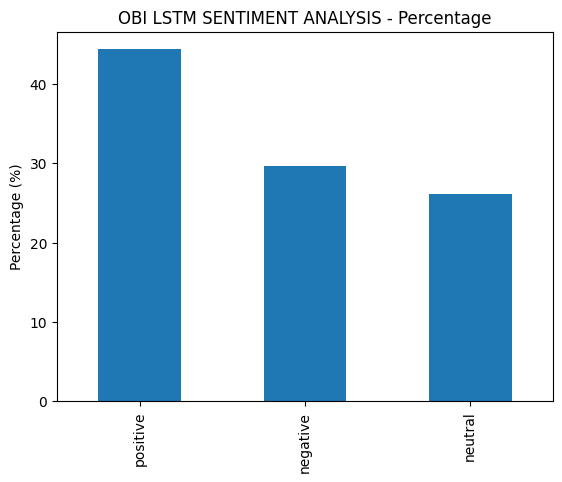

In [ ]:
import matplotlib.pyplot as plt

# Calculate the percentage for each sentiment category
Obi_percentage_counts = (Obi_sentiment_result['Obi_LSTM_Sentiment'].value_counts(normalize=True) * 100).round(2)

# Plotting the percentages
Obi_percentage_counts.plot(kind='bar', title='OBI LSTM SENTIMENT ANALYSIS - Percentage')
plt.ylabel('Percentage (%)')
plt.show()

In [ ]:
Obi_percentage_counts

positive    44.31
negative    29.58
neutral     26.11
Name: Obi_LSTM_Sentiment, dtype: float64

## **Atiku's sentiment Analysis**

In [ ]:
import pandas as pd
import numpy as np

path =  '/content/drive/MyDrive/Project_codes/Atiku_cleaned_dataset.csv'
Atiku_data = pd.read_csv(path)
Atiku_data = Atiku_data.replace(np.nan, '', regex=True)
Atiku_text = Atiku_data['cleaned_text'].tolist()
# Tokenize and pad the new text
Atiku_text_sequences = tokenizer.texts_to_sequences(Atiku_text)
Atiku_text_padded = pad_sequences(Atiku_text_sequences, maxlen=X_padded.shape[1])
# Make predictions
predictions = model.predict(Atiku_text_padded)
# Assuming 'predictions' is a one-hot encoded array, you can get the predicted class index
predicted_class_index = predictions.argmax(axis=1)
# initialise the  class to 3
num_classes = 3
# Reshape the predicted_class_index to have the same number of columns as the original encoding
predicted_class_index = predicted_class_index.reshape(-1, 1)
# Create a new array with zeros
predicted_class_encoded = np.zeros((predicted_class_index.shape[0], num_classes))
# Set the predicted class to 1 for each row
predicted_class_encoded[np.arange(predicted_class_index.shape[0]), predicted_class_index.flatten()] = 1
# Inverse transform the encoded array
predicted_class_label = encoder.inverse_transform(predicted_class_encoded)


996/996 [==============================] - 3s 3ms/step


In [ ]:
# Generate the prdicted data of Atiku
Atiku_data
Atiku_sentiment_result = pd.DataFrame(predicted_class_label, columns=['Atiku_LSTM_Sentiment'])
Atiku_sentiment_result['text'] = Atiku_text

Atiku_sentiment_result

,Atiku_LSTM_Sentiment,text
0,negative,elder statesman tanko yakassai drop bomb tinub...
1,positive,dailypostngr kwankwaso win without merge nah w...
2,positive,first time vote apc 2019 best time 2023 yoruba...
3,positive,atiku wont win 22 apc governor 5 pdp governor ...
4,negative,tinubu go campaign rally insult peter obi danc...
...,...,...
31849,positive,poll project apc win 2023 election anap poll p...
31850,neutral,wing unifier atikuyouthwing tell fact bauchi s...
31851,negative,north ecially core north always power hungry d...
31852,negative,inec postpone election insecurity click watch ...


<Axes: title={'center': 'Atiku LSTM SENTIMENT ANALYSIS'}>

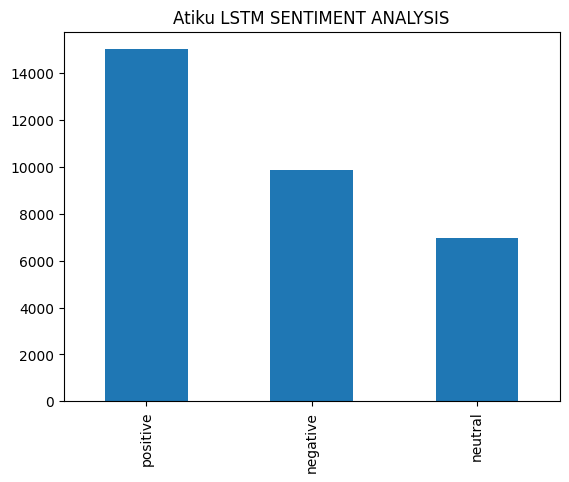

In [ ]:
Atiku_sentiment_result['Atiku_LSTM_Sentiment'].value_counts().plot(kind ='bar', title = 'Atiku LSTM SENTIMENT ANALYSIS') # plot the Atiku sentiment graph

In [ ]:
Atiku_sentiment_result['Atiku_LSTM_Sentiment'].value_counts()

positive    15323
negative     9176
neutral      7355
Name: Atiku_LSTM_Sentiment, dtype: int64

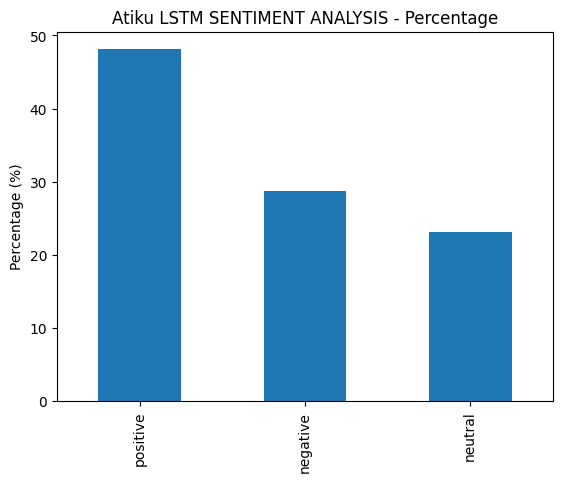

In [ ]:
import matplotlib.pyplot as plt


# Calculate the percentage for each sentiment category
Atiku_percentage_counts = (Atiku_sentiment_result['Atiku_LSTM_Sentiment'].value_counts(normalize=True) * 100).round(2)

# Plotting the percentages
Atiku_percentage_counts.plot(kind='bar', title='Atiku LSTM SENTIMENT ANALYSIS - Percentage')
plt.ylabel('Percentage (%)')
plt.show()

# **Comparative Analysis of the three candidates**

In [ ]:
Atiku_percentage_counts

positive    48.10
negative    28.81
neutral     23.09
Name: Atiku_LSTM_Sentiment, dtype: float64

In [ ]:
Obi_predicted_count = Obi_sentiment_result['Obi_LSTM_Sentiment'].value_counts()
Obi_sentiment_result['Obi_LSTM_Sentiment'].value_counts() # get Obi sentiments' count

positive    98808
negative    62979
neutral     61875
Name: Obi_LSTM_Sentiment, dtype: int64

In [ ]:
Tinubu_predicted_count = Tinubu_sentiment_result['Tinubu_LSTM_Sentiment'].value_counts()
Tinubu_sentiment_result['Tinubu_LSTM_Sentiment'].value_counts() # get Tinubu sentiments' count

positive    78548
negative    52158
neutral     45922
Name: Tinubu_LSTM_Sentiment, dtype: int64

In [ ]:
Atiku_predicted_count = Atiku_sentiment_result['Atiku_LSTM_Sentiment'].value_counts()
Atiku_sentiment_result['Atiku_LSTM_Sentiment'].value_counts() # get Atiku sentiments' count

positive    15451
negative     9111
neutral      7292
Name: Atiku_LSTM_Sentiment, dtype: int64

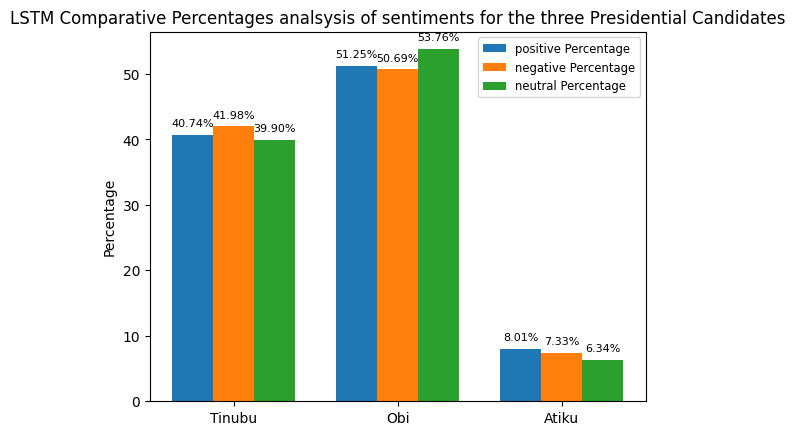

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# list of the 3 candidates names
labels = ['Tinubu', 'Obi', 'Atiku']
categories = ['positive', 'negative', 'neutral']

#
data = np.array([
    [Tinubu_predicted_count['positive'], Tinubu_predicted_count['negative'], Tinubu_predicted_count['neutral']],  # Tinubu
    [Obi_predicted_count['positive'], Obi_predicted_count['negative'], Obi_predicted_count['neutral']],  #Obi
    [Atiku_predicted_count['positive'], Atiku_predicted_count['negative'], Atiku_predicted_count['neutral']],  # Atiku
])

# Calculate overall counts for each category
overall_category_counts = np.sum(data, axis=0)

# Calculate relative percentages
relative_percentages = (data / overall_category_counts) * 100

# Plotting
fig, ax = plt.subplots()

# Plot stacked bar chart
bar_width = 0.25
bar_positions = np.arange(len(labels))

for i, category in enumerate(categories):
    ax.bar(bar_positions + i * bar_width, relative_percentages[:, i], width=bar_width, label=f'{category} Percentage')

# Modifying the bar abd legends labels
ax.set_ylabel('Percentage')
ax.set_title('LSTM Comparative Percentages analsysis of sentiments for the three Presidential Candidates')
ax.set_xticks(bar_positions + (len(categories) - 1) * bar_width / 2)
ax.set_xticklabels(labels)
legend = ax.legend(fontsize='small', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor to position the legend

# Display percentages on top of bars with reduced font size
for i, bar_position in enumerate(bar_positions):
    for j, category in enumerate(categories):
        yval = relative_percentages[i, j]
        ax.text(bar_position + j * bar_width, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=8)

plt.show()


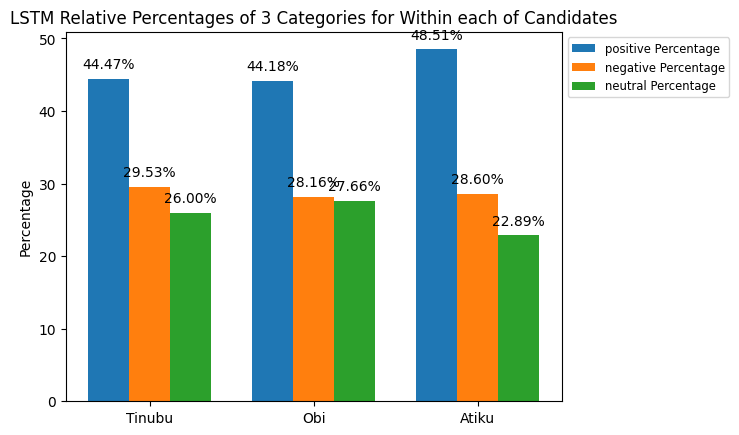

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#
labels = ['Tinubu', 'Obi', 'Atiku']
categories = ['positive', 'negative', 'neutral']

# P
data = np.array([
    [Tinubu_predicted_count['positive'], Tinubu_predicted_count['negative'], Tinubu_predicted_count['neutral']],  # Label 1
    [Obi_predicted_count['positive'], Obi_predicted_count['negative'], Obi_predicted_count['neutral']],  # Label 2
    [Atiku_predicted_count['positive'], Atiku_predicted_count['negative'], Atiku_predicted_count['neutral']],  # Label 3
])

# Calculate overall percentages for each label
overall_percentages = np.sum(data, axis=1)

# Normalize data to get relative percentages
normalized_data = (data.T / overall_percentages).T * 100

# Plotting
fig, ax = plt.subplots()

# Plot stacked bar chart
bar_width = 0.25
bar_positions = np.arange(len(labels))

for i, category in enumerate(categories):
    ax.bar(bar_positions + i * bar_width, normalized_data[:, i], width=bar_width, label=f'{category} Percentage')

# Adding labels
ax.set_ylabel('Percentage')
ax.set_title('LSTM Relative Percentages of 3 Categories for Within each of Candidates')
ax.set_xticks(bar_positions + (len(categories) - 1) * bar_width / 2)
ax.set_xticklabels(labels)
legend = ax.legend(fontsize='small', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor to position the legend

# Display percentages on top of bars
for i, bar_position in enumerate(bar_positions):
    for j, category in enumerate(categories):
        yval = normalized_data[i, j]
        ax.text(bar_position + j * bar_width, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()


